Using CNN


In [1]:
import numpy as np
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import cv2
import os



In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shadowmonarchsunjin","key":"42bc0f9d1cc262c501d04c8a6d0550fc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images


Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
100% 1.68G/1.68G [00:06<00:00, 300MB/s]
100% 1.68G/1.68G [00:07<00:00, 258MB/s]


In [5]:
!unzip deepfake-and-real-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [60]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    #path = list(os.listdir(folder))
    #size = int(len(path)/2)
    #print(size)
    #half = path[:size]
    #print(len(half))
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128 pixels
            images.append(img)
            labels.append(label)
    return images, labels

real_images, real_labels = load_images_from_folder('Dataset/Train/Real', 0)
fake_images, fake_labels = load_images_from_folder('Dataset/Train/Fake', 1)

# Combine real and fake data
print(len(real_images))
print(len(fake_images))

images = np.array(real_images + fake_images)
labels = np.array(real_labels + fake_labels)

70001
70001


In [61]:
images.shape

(140002, 128, 128, 3)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0


In [59]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3501/3501 [==============================] - 382s 109ms/step - loss: 0.3112 - accuracy: 0.8581 - val_loss: 0.1930 - val_accuracy: 0.9205
Epoch 2/10
3501/3501 [==============================] - 368s 105ms/step - loss: 0.1569 - accuracy: 0.9357 - val_loss: 0.1228 - val_accuracy: 0.9515
Epoch 3/10
3501/3501 [==============================] - 371s 106ms/step - loss: 0.1232 - accuracy: 0.9509 - val_loss: 0.1145 - val_accuracy: 0.9545
Epoch 4/10
3501/3501 [==============================] - 371s 106ms/step - loss: 0.1063 - accuracy: 0.9577 - val_loss: 0.1087 - val_accuracy: 0.9580
Epoch 5/10
3501/3501 [==============================] - 368s 105ms/step - loss: 0.0949 - accuracy: 0.9621 - val_loss: 0.1024 - val_accuracy: 0.9602
Epoch 6/10
3501/3501 [==============================] - 368s 105ms/step - loss: 0.0845 - accuracy: 0.9667 - val_loss: 0.1142 - val_accuracy: 0.9575
Epoch 7/10
3501/3501 [==============================] - 368s 105ms/step - loss: 0.0783 - accuracy: 0.9689 - val_

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

876/876 [==============================] - 25s 28ms/step - loss: 0.1019 - accuracy: 0.9664
Test Accuracy: 96.64%


In [ ]:
import sys

print(sys.getsizeof(model))

48


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/gaji.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Resize to 224x224 if that's what your model expects
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Load your pre-trained deep fake analysis model
#model = tf.keras.models.load_model('path_to_your_model.h5')

# Pass the image through the model
predictions = model.predict(img_array)

# Interpret the results
print(predictions)

1/1 [==============================] - 0s 116ms/step
[[0.02657638]]


In [17]:
# Save the model
model.save('model_v2.h5')

# Load the model
from keras.models import load_model
image_model = load_model('model_v2.h5')


In [50]:
loss,accuracy = image_model.evaluate(x_test,y_test)

876/876 [==============================] - 24s 28ms/step - loss: 0.1019 - accuracy: 0.9664


In [51]:
print(f"The loss is {loss}. The accuracy is {accuracy}")

The loss is 0.10192351788282394. The accuracy is 0.9663583636283875


876/876 [==============================] - 23s 27ms/step


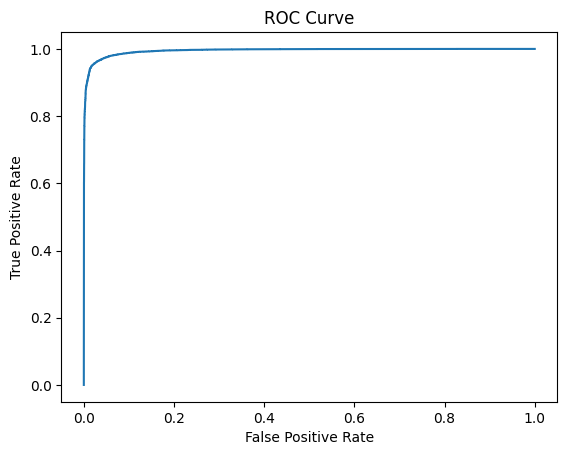

Optimal Threshold: 0.5305517


In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming 'y_true' are the true labels and 'y_pred_prob' are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, image_model.predict(x_test))

# Plotting the ROC curve to visually determine the best threshold
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Determine the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)
